In [8]:
import numpy
import math
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

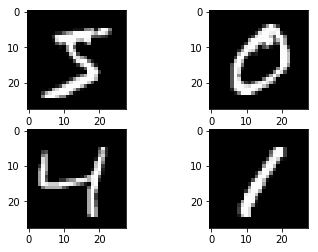

In [9]:
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [10]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [11]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [12]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [13]:

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = 10

In [14]:
# define baseline model
def base_model(hidden_layers, neurons):
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='tanh'))
    for h in range(hidden_layers):
        model.add(Dense(int(num_pixels/(math.pow(2,neurons+1))), kernel_initializer='normal', activation='tanh'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    return model

In [15]:
for layer in range(1, 3):
    for neuron in range(0, 4):
        # build the model
        model = base_model(layer, neuron)
        # Fit the model
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
        # Final evaluation of the model
        scores = model.evaluate(X_test, y_test, verbose=0)
        print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 17s - loss: 0.3075 - acc: 0.9145 - val_loss: 0.1638 - val_acc: 0.9533
Epoch 2/10
 - 17s - loss: 0.1368 - acc: 0.9611 - val_loss: 0.1248 - val_acc: 0.9650
Epoch 3/10
 - 17s - loss: 0.1048 - acc: 0.9710 - val_loss: 0.1041 - val_acc: 0.9696
Epoch 4/10
 - 17s - loss: 0.0854 - acc: 0.9759 - val_loss: 0.0928 - val_acc: 0.9730
Epoch 5/10
 - 17s - loss: 0.0719 - acc: 0.9807 - val_loss: 0.0891 - val_acc: 0.9735
Epoch 6/10
 - 17s - loss: 0.0618 - acc: 0.9839 - val_loss: 0.0834 - val_acc: 0.9747
Epoch 7/10
 - 17s - loss: 0.0537 - acc: 0.9858 - val_loss: 0.0778 - val_acc: 0.9768
Epoch 8/10
 - 17s - loss: 0.0473 - acc: 0.9882 - val_loss: 0.0757 - val_acc: 0.9768
Epoch 9/10
 - 23s - loss: 0.0419 - acc: 0.9896 - val_loss: 0.0738 - val_acc: 0.9783
Epoch 10/10
 - 21s - loss: 0.0375 - acc: 0.9914 - val_loss: 0.0718 - val_acc: 0.9790
Baseline Error: 2.10%
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 14s - loss: 0.3040 - ac

In [16]:
# checking for neural network with 0 hidden layers
layer = 0
for neuron in range(0, 4):
    # build the model
    model = base_model(layer, neuron)
    # Fit the model
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
    # Final evaluation of the model
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 11s - loss: 0.3555 - acc: 0.9019 - val_loss: 0.2424 - val_acc: 0.9282
Epoch 2/10
 - 11s - loss: 0.2142 - acc: 0.9389 - val_loss: 0.1948 - val_acc: 0.9418
Epoch 3/10
 - 11s - loss: 0.1777 - acc: 0.9503 - val_loss: 0.1725 - val_acc: 0.9512
Epoch 4/10
 - 10s - loss: 0.1534 - acc: 0.9573 - val_loss: 0.1518 - val_acc: 0.9576
Epoch 5/10
 - 10s - loss: 0.1361 - acc: 0.9622 - val_loss: 0.1413 - val_acc: 0.9598
Epoch 6/10
 - 10s - loss: 0.1226 - acc: 0.9659 - val_loss: 0.1304 - val_acc: 0.9612
Epoch 7/10
 - 10s - loss: 0.1117 - acc: 0.9692 - val_loss: 0.1227 - val_acc: 0.9657
Epoch 8/10
 - 10s - loss: 0.1025 - acc: 0.9715 - val_loss: 0.1173 - val_acc: 0.9653
Epoch 9/10
 - 10s - loss: 0.0948 - acc: 0.9742 - val_loss: 0.1102 - val_acc: 0.9684
Epoch 10/10
 - 10s - loss: 0.0883 - acc: 0.9760 - val_loss: 0.1055 - val_acc: 0.9696
Baseline Error: 3.04%
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 11s - loss: 0.3521 - ac

for layer in range(1, 3):
    for neuron in range(0, 4):
        # build the model
        model = base_model(layer, neuron)
        # Fit the model
        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
        # Final evaluation of the model
        scores = model.evaluate(X_test, y_test, verbose=0)
        print("Baseline Error: %.2f%%" % (100-scores[1]*100))

In [19]:
# Best model with tanh activation function - 2 hidden layers, 392 neurons - 98.02%
# build the model
model = base_model(2, 0)
# Fit the model
output = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 20s - loss: 0.3703 - acc: 0.8967 - val_loss: 0.1532 - val_acc: 0.9542
Epoch 2/10
 - 19s - loss: 0.1276 - acc: 0.9625 - val_loss: 0.1134 - val_acc: 0.9647
Epoch 3/10
 - 19s - loss: 0.0916 - acc: 0.9732 - val_loss: 0.0974 - val_acc: 0.9699
Epoch 4/10
 - 19s - loss: 0.0701 - acc: 0.9796 - val_loss: 0.0894 - val_acc: 0.9710
Epoch 5/10
 - 20s - loss: 0.0554 - acc: 0.9842 - val_loss: 0.0769 - val_acc: 0.9770
Epoch 6/10
 - 20s - loss: 0.0444 - acc: 0.9877 - val_loss: 0.0734 - val_acc: 0.9765
Epoch 7/10
 - 22s - loss: 0.0354 - acc: 0.9910 - val_loss: 0.0688 - val_acc: 0.9785
Epoch 8/10
 - 20s - loss: 0.0286 - acc: 0.9927 - val_loss: 0.0672 - val_acc: 0.9783
Epoch 9/10
 - 20s - loss: 0.0236 - acc: 0.9945 - val_loss: 0.0624 - val_acc: 0.9795
Epoch 10/10
 - 20s - loss: 0.0193 - acc: 0.9958 - val_loss: 0.0611 - val_acc: 0.9802
Baseline Error: 1.98%


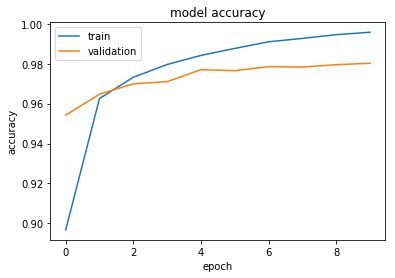

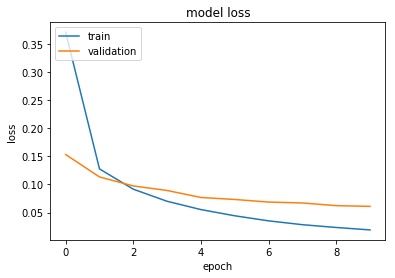

In [20]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()